author: @SteveEckel

This example covers calculating the forces in a one-dimensional optical molasses
using the optical bloch equations.  It reproduces Fig. 1 of Devlin, J. A. and
Tarbutt, M. R.  ‘Three-dimensional Doppler, polarization-gradient, and
magneto-optical forces for atoms and molecules with dark states’, *New Journal of
Physics*, **18** 123017 (2016). http://dx.doi.org/10.1088/1367-2630/18/12/123017.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp

First, define the laser beams:

In [2]:
det = -2.5
beta = 1.0

laserBeams = {}
laserBeams['$\\sigma^+\\sigma^-$'] = pylcp.laserBeams([
    {'kvec':np.array([0., 0., 1.]), 'pol':np.array([0., 0., 1.]),
     'pol_coord':'spherical', 'delta':0, 'beta':beta},
    {'kvec':np.array([0., 0., -1.]), 'pol':np.array([1., 0., 0.]),
     'pol_coord':'spherical', 'delta':0, 'beta':beta},
    ], beam_type=pylcp.infinitePlaneWaveBeam)

phi = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
phi_keys = ['$\phi=0$', '$\phi=\pi/8$', '$\phi=\pi/4$', '$\phi=3\pi/8$', '$\phi=\pi/2$']
for phi_i, key_beam in zip(phi, phi_keys):
    laserBeams[key_beam] = pylcp.laserBeams([
        {'kvec':np.array([0., 0., 1.]), 'pol':np.array([1., 0., 0.]),
         'pol_coord':'cartesian', 'delta':0, 'beta':beta},
        {'kvec':np.array([0., 0., -1.]),
         'pol':np.array([np.cos(phi_i), np.sin(phi_i), 0.]),
         'pol_coord':'cartesian', 'delta':0, 'beta':beta}
        ], beam_type=pylcp.infinitePlaneWaveBeam)

hamiltonian = {}
for Fg, Fe in zip([1, 1, 2], [2, 1, 1]):
    Hg, Bgq = pylcp.hamiltonians.singleF(F=Fg, gF=0, muB=1)
    He, Beq = pylcp.hamiltonians.singleF(F=Fe, gF=1/Fe, muB=1)
    dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(Fg, Fe)
    hamiltonian['Fg%d;Fe%d'%(Fg,Fe)] = pylcp.hamiltonian(
        Hg, He - det*np.eye(2*Fe+1), Bgq, Beq, dijq
        )

magField = pylcp.constantMagneticField(np.zeros((3,)))

Next, run the OBEs:

In [3]:
obe = {}
v = np.concatenate((np.arange(0.0, 0.1, 0.001),
                    np.arange(0.1, 5.1, 0.1)))
#v = np.arange(-0.1, 0.1, 0.01)

for key_ham in hamiltonian.keys():
    if key_ham not in obe.keys():
        obe[key_ham] = {}

    for key_beam in laserBeams.keys():
        print('Running %s w/ %s' % (key_ham, key_beam) + '...')
        obe[key_ham][key_beam] = pylcp.obe(laserBeams[key_beam],
                                           magField, hamiltonian[key_ham],
                                           transform_into_re_im=True,
                                           use_sparse_matrices=False)

        obe[key_ham][key_beam].generate_force_profile(
            [np.zeros(v.shape), np.zeros(v.shape), np.zeros(v.shape)],
            [np.zeros(v.shape), np.zeros(v.shape), v],
            name='molasses', deltat_v=4, deltat_tmax=2*np.pi*5000, itermax=1000,
            rel=1e-8, abs=1e-10, progress_bar=True
        )

Running Fg1;Fe2 w/ $\sigma^+\sigma^-$...
Completed in 8:03.                                                  
Running Fg1;Fe2 w/ $\phi=0$...
Completed in 6:36.                                                  
Running Fg1;Fe2 w/ $\phi=\pi/8$...
Completed in 7:10.                                                  
Running Fg1;Fe2 w/ $\phi=\pi/4$...
Completed in 6:33.                                                  
Running Fg1;Fe2 w/ $\phi=3\pi/8$...
Completed in 6:58.                                                  
Running Fg1;Fe2 w/ $\phi=\pi/2$...
Completed in 7:10.                                                  
Running Fg1;Fe1 w/ $\sigma^+\sigma^-$...
Completed in 3:41.                                                  
Running Fg1;Fe1 w/ $\phi=0$...
Completed in 5:00.                                                  
Running Fg1;Fe1 w/ $\phi=\pi/8$...
Completed in 7:07.                                                  
Running Fg1;Fe1 w/ $\phi=\pi/4$...
Completed in 7:02.      

### Plot 'er up:

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


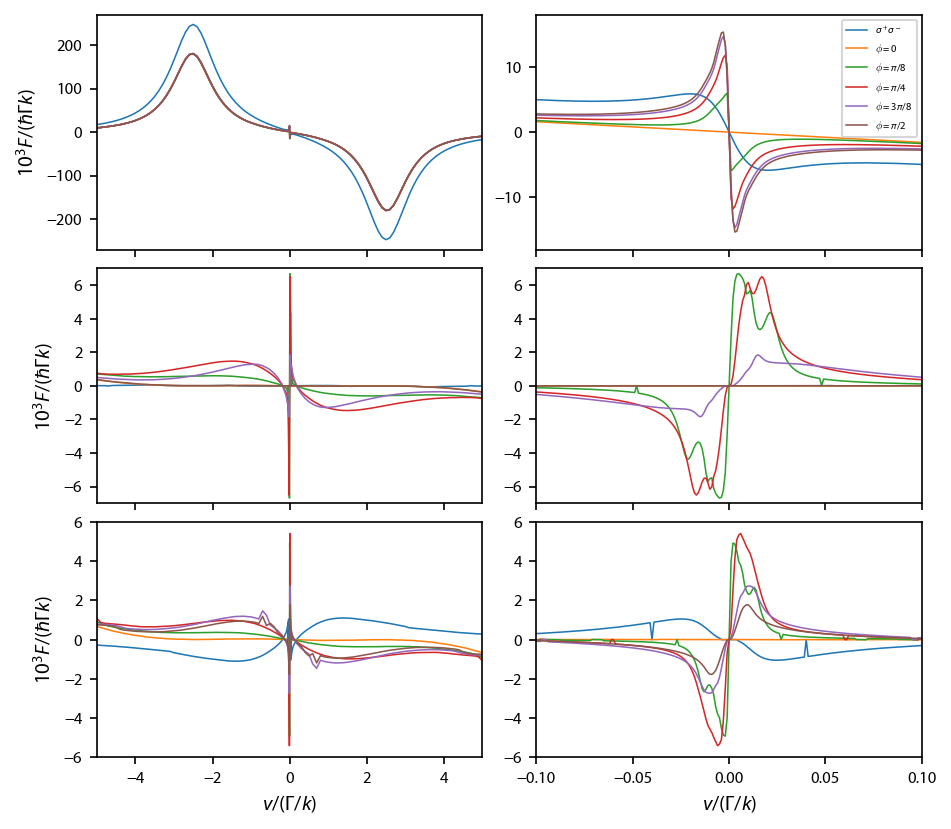

In [4]:
fig, ax = plt.subplots(3, 2, num='F=1->F=2', figsize=(6.25, 2*2.75))

ylims = [[270, 7, 6], [18, 7, 6]]
for ii, key_ham in enumerate(hamiltonian.keys()):
    for key_beam in laserBeams.keys():
        ax[ii, 0].plot(np.concatenate((-v[::-1], v)),
                        1e3*np.concatenate(
                            (-obe[key_ham][key_beam].profile['molasses'].F[2][::-1],
                             obe[key_ham][key_beam].profile['molasses'].F[2])
                            ),
                       label=key_beam, linewidth=0.75)
        ax[ii, 1].plot(np.concatenate((-v[::-1], v)),
                        1e3*np.concatenate(
                            (-obe[key_ham][key_beam].profile['molasses'].F[2][::-1],
                             obe[key_ham][key_beam].profile['molasses'].F[2])
                            ),
                       label=key_beam, linewidth=0.75)

    ax[ii, 0].set_xlim((-5, 5))
    ax[ii, 1].set_xlim((-0.1, 0.1))
    ax[ii, 0].set_ylim((-ylims[0][ii], ylims[0][ii]))
    ax[ii, 1].set_ylim((-ylims[1][ii], ylims[1][ii]))

ax[-1, 0].set_xlabel('$v/(\Gamma/k)$')
ax[-1, 1].set_xlabel('$v/(\Gamma/k)$')
for ii in range(len(hamiltonian)):
    ax[ii, 0].set_ylabel('$10^3 F/(\hbar\Gamma k)$')

for ii in range(len(hamiltonian)-1):
    for jj in range(2):
        ax[ii, jj].set_xticklabels([])

ax[0, 1].legend(fontsize=5)
fig.subplots_adjust(wspace=0.14, hspace=0.08, left=0.1, bottom=0.08)

#fig.savefig('02_F_to_Fp_1D_molasses.pdf')
